In [1]:
import main_swan_input as swan_inp
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#%cd /media/nicolas/DATA/era5_wave_spectrum/swan_nest_porto_ilha_202310/

/home/nicolas/anaconda3/lib/python3.9/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.21.0 or higher is recommended. You are running version 2.16.0
  warnings.warn(
/home/nicolas/anaconda3/lib/python3.9/abc.py:106: FutureWarning: xarray subclass OceanWaves should explicitly define __slots__
  cls = super().__new__(mcls, name, bases, namespace, **kwargs)


In [4]:
## Load ERA5 partition DATABASE

dset = xr.open_dataset('wave_partitions_meq_202403_s1.nc')



In [ ]:
####################
##                ##
## GRID 1 -> 5 km ##
##                ##
####################

era5_data = dset

time_0 = era5_data.time.values[0]
time_end = era5_data.time.values[-1]
time = pd.date_range(time_0, time_end,freq='1H')
time_model = time.format(formatter=lambda x: x.strftime('%Y%m%d.%H%M%S'))

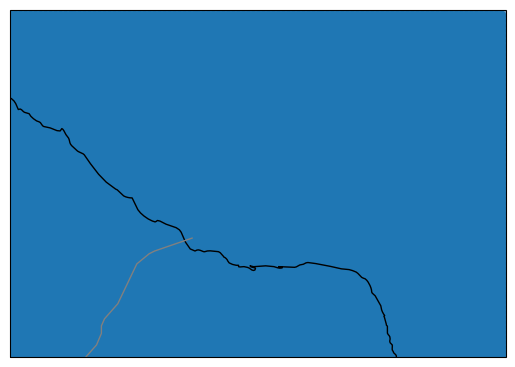

/home/nicolas/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/nicolas/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/nicolas/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/nicolas/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_i

/home/nicolas/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/nicolas/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/nicolas/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/nicolas/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_i

In [11]:
## RIO GRANDE DO NORTE GRID

## Generate grid regular with vertices coordinate 

lon_e = -34
lon_w = -39
lat_s = -6
lat_n = -2.5

vert_N, vert_E, vert_S, vert_W, coord_N, coord_S, coord_E, coord_W = swan_inp.swan_grid_reg(lon_w, 
                                                                                            lon_e, 
                                                                                            lat_s, 
                                                                                            lat_n, 
                                                                                            0.05)

## GENERATE GRID

bound_N = swan_inp.boundary(era5_data,coord_N)
bound_S = swan_inp.boundary(era5_data,coord_S)
bound_E = swan_inp.boundary(era5_data,coord_E)
bound_W = swan_inp.boundary(era5_data,coord_W)

xi, yi = swan_inp.swan_grid_curv(vert_S, vert_E, 'swan_grid_d01_east.dat')

In [12]:
###### WAVE BOUNDARY CONDITION FROM SPEC2d 

spec_N = swan_inp.spec_bound(bound_N)
spec_S = swan_inp.spec_bound(bound_S)
spec_E = swan_inp.spec_bound(bound_E)
spec_W = swan_inp.spec_bound(bound_W)

swan_inp.write_specs(time, bound_N, spec_N,'n_', ext='.spc2d')
swan_inp.write_specs(time, bound_S, spec_S,'s_', ext='.spc2d')
swan_inp.write_specs(time, bound_E, spec_E,'e_', ext='.spc2d')
swan_inp.write_specs(time, bound_W, spec_W,'w_', ext='.spc2d')

swan_inp.write_namelist_wave_boundary('north',vert_N,bound_N, np.shape(vert_N)[1], np.shape(vert_E)[1])
swan_inp.write_namelist_wave_boundary('south',vert_S,bound_S, np.shape(vert_N)[1], np.shape(vert_E)[1])
swan_inp.write_namelist_wave_boundary('east',vert_E,bound_E, np.shape(vert_N)[1], np.shape(vert_E)[1])
swan_inp.write_namelist_wave_boundary('west',vert_W,bound_W, np.shape(vert_N)[1], np.shape(vert_E)[1])

/media/nicolas/DATA/era5_wave_spectrum/swan_porto_ilha_202403/main_swan_input.py:549: RuntimeWarning: invalid value encountered in true_divide
  corr = Hs ** 2 / (16 * trapz_and_repeat(jon, freq))


(10, 744, 25, 36)
(10, 744, 25, 36)
(10, 744, 25, 36)
(10, 744, 25, 36)
(10, 744, 25, 36)
(10, 744, 25, 36)
(10, 744, 25, 36)
(10, 744, 25, 36)
(7, 744, 25, 36)
(7, 744, 25, 36)
(7, 744, 25, 36)
(7, 744, 25, 36)
(7, 744, 25, 36)
(7, 744, 25, 36)
(7, 744, 25, 36)
(7, 744, 25, 36)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,261,212,239,197,213,187,156,153,187,198,...,-3163,-3285,-3408,-3645,-3765,-3907,-4110,-4199,-4248,-4278
1,254,223,180,192,204,159,161,139,153,179,...,-3253,-3380,-3250,-3433,-3745,-3900,-3971,-4110,-4203,-4242
2,207,198,171,171,172,146,151,132,145,151,...,-3134,-2891,-3344,-3393,-3809,-3954,-4010,-4038,-4104,-4181
3,206,164,184,166,157,152,152,143,135,158,...,-2905,-2983,-3351,-3629,-3814,-3957,-4040,-4067,-4091,-4158
4,228,250,149,142,133,139,128,113,144,151,...,-3029,-3367,-3747,-3827,-3915,-4013,-4067,-4086,-4116,-4168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,-1290,-1535,-1728,-1801,-2030,-2188,-2263,-2355,-2430,-2456,...,-3984,-3999,-4013,-4025,-4037,-4049,-4060,-4071,-4083,-4100
67,-1548,-1827,-2064,-2110,-2120,-2283,-2395,-2424,-2504,-2530,...,-3998,-4013,-4026,-4037,-4048,-4058,-4068,-4079,-4091,-4106
68,-1729,-2054,-2250,-2351,-2342,-2355,-2468,-2551,-2577,-2606,...,-4014,-4027,-4039,-4050,-4059,-4068,-4076,-4085,-4096,-4108
69,-1870,-2056,-2254,-2468,-2552,-2538,-2576,-2603,-2666,-2677,...,-4031,-4044,-4054,-4063,-4070,-4077,-4083,-4091,-4100,-4111


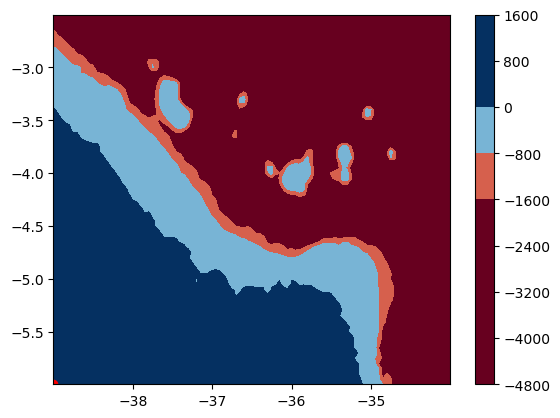

In [13]:
## BOTTOM GRID

#swan_inp.bathy2swan_curv('../gebco_meb_2023.nc', 'bathy_meqeast_d01', vert_S, vert_E)
swan_inp.bathy2swan_curv('../gebco_meb_2023.nc', 'bathy_meqeast_d01.bot', vert_S, vert_E)

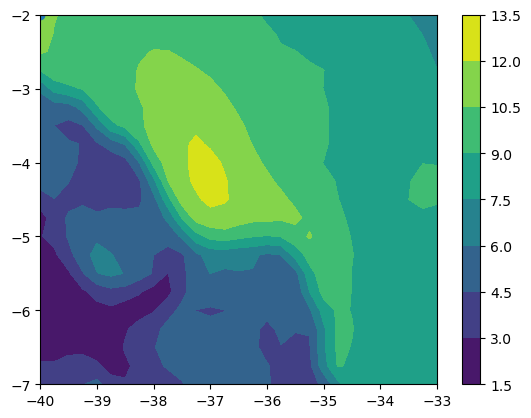

In [22]:
## WIND GRID


time_init = '2023-10-01T00:00:00.000000000'
time_end = '2023-10-31T23:00:00.000000000'

aa = swan_inp.wind_era52swan('../wind_meq_2023.nc', 'wind_era5_rn_202310',
                             time_init, time_end, lon_e, lon_w, lat_s, lat_n)

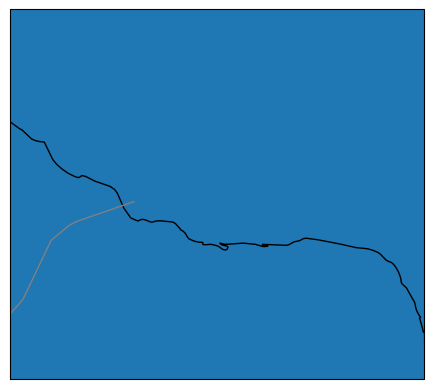

/home/nicolas/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/nicolas/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/nicolas/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/nicolas/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_i

In [5]:
####################
##                ##
## GRID 2 -> 2 km ##
##                ##
####################


## Load ERA5 partition DATABASE

dset = xr.open_dataset('wave_partitions_meq_202403_s1.nc')
era5_data = dset

lon_e = -35.2
lon_w = -38
lat_s = -6
lat_n = -3.5

vert_N, vert_E, vert_S, vert_W, coord_N, coord_S, coord_E, coord_W = swan_inp.swan_grid_reg(lon_w, 
                                                                                            lon_e,
                                                                                            lat_s, 
                                                                                            lat_n, 
                                                                                            0.02)

## GENERATE GRID

bound_N = swan_inp.boundary(era5_data,coord_N)
bound_S = swan_inp.boundary(era5_data,coord_S)
bound_E = swan_inp.boundary(era5_data,coord_E)
bound_W = swan_inp.boundary(era5_data,coord_W)

xi, yi = swan_inp.swan_grid_curv(vert_S, vert_E, 'swan_grid_d02_east.dat')

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,585,499,235,204,216,222,303,205,188,164,...,77,86,80,68,61,64,66,46,50,55
1,543,576,278,193,206,200,202,196,171,169,...,94,55,72,71,60,59,60,59,50,27
2,204,290,193,184,188,189,191,201,189,185,...,100,78,70,67,43,53,30,51,45,49
3,172,184,179,170,174,175,199,181,192,185,...,58,76,63,68,58,56,47,36,21,39
4,153,156,172,172,172,184,183,175,185,178,...,24,69,69,59,64,59,57,45,47,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,-51,-63,-99,-214,-336,-409,-486,-627,-787,-937,...,-3532,-3500,-3418,-3378,-3381,-3387,-3393,-3390,-3378,-3366
122,-59,-86,-137,-343,-505,-597,-669,-763,-935,-1083,...,-3556,-3537,-3487,-3465,-3474,-3478,-3462,-3437,-3402,-3375
123,-64,-108,-240,-485,-652,-779,-868,-995,-1109,-1234,...,-3556,-3550,-3533,-3524,-3527,-3532,-3506,-3467,-3407,-3365
124,-111,-226,-399,-576,-843,-963,-1035,-1149,-1270,-1372,...,-3562,-3563,-3560,-3556,-3553,-3550,-3518,-3471,-3404,-3330


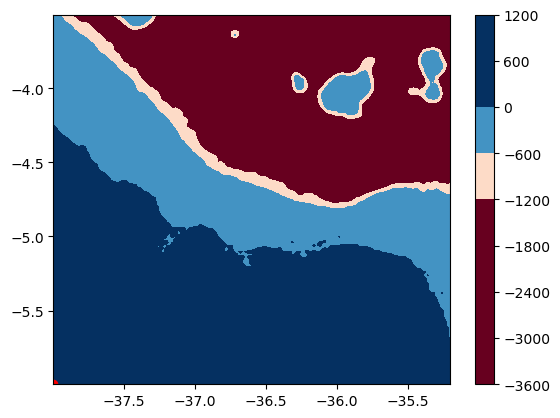

In [6]:
#swan_inp.bathy2swan_curv('../gebco_meb_2023.nc', 'bathy_meqeast_d02', vert_S, vert_E)
swan_inp.bathy2swan_curv('../gebco_meb_2023.nc', 'bathy_meqeast_d02.bot', vert_S, vert_E)


In [3]:
%ls

bathy_meqeast_d01.bot*         build_grid_swan.ipynb*
bathy_namelist_input*          main_swan_input.py*
boundary_202403/               __pycache__/
boundary_namelist_wave_E.txt*  swan_grid_d01_east.dat*
boundary_namelist_wave_N.txt*  swan_grid_input.txt*
boundary_namelist_wave_S.txt*  wave_partitions_meq_202403_s1.nc*
boundary_namelist_wave_W.txt*  wind_meq_202403.nc*
